In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from math import pi
from wordcloud import WordCloud

In [16]:
data = pd.read_csv('./all_classification_reports.csv')
data.head()

,index,precision,recall,f1-score,support,model
0,negative,0.7500,1.00,0.857143,30.00,Logistic Regression
1,neutral,0.0000,0.00,0.000000,10.00,Logistic Regression
2,accuracy,0.7500,0.75,0.750000,0.75,Logistic Regression
3,macro avg,0.3750,0.50,0.428571,40.00,Logistic Regression
4,weighted avg,0.5625,0.75,0.642857,40.00,Logistic Regression


C:\Users\andi1\AppData\Local\Temp\ipykernel_17924\3885777589.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=accuracy, x='model', y='accuracy', palette='Blues_d')


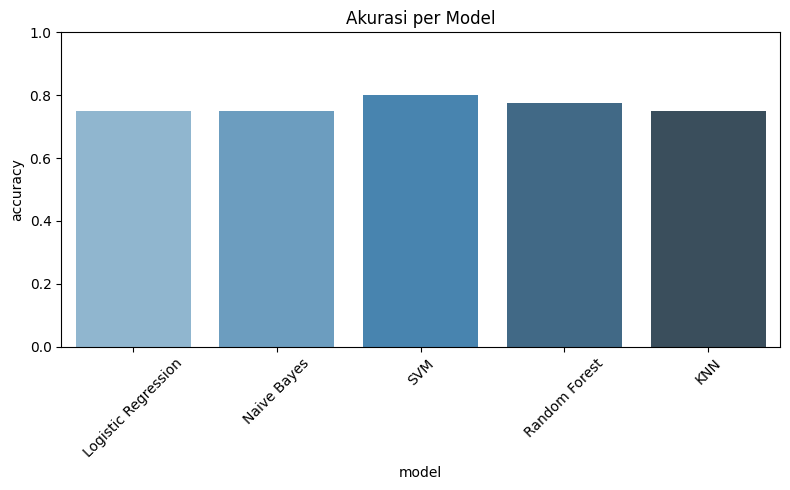

In [17]:
# Ambil akurasi model
accuracy = data[data['index'] == 'accuracy'][['model', 'f1-score']].rename(columns={'f1-score': 'accuracy'})

# Plot Akurasi
plt.figure(figsize=(8, 5))
sns.barplot(data=accuracy, x='model', y='accuracy', palette='Blues_d')
plt.xticks(rotation=45)
plt.title('Akurasi per Model')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

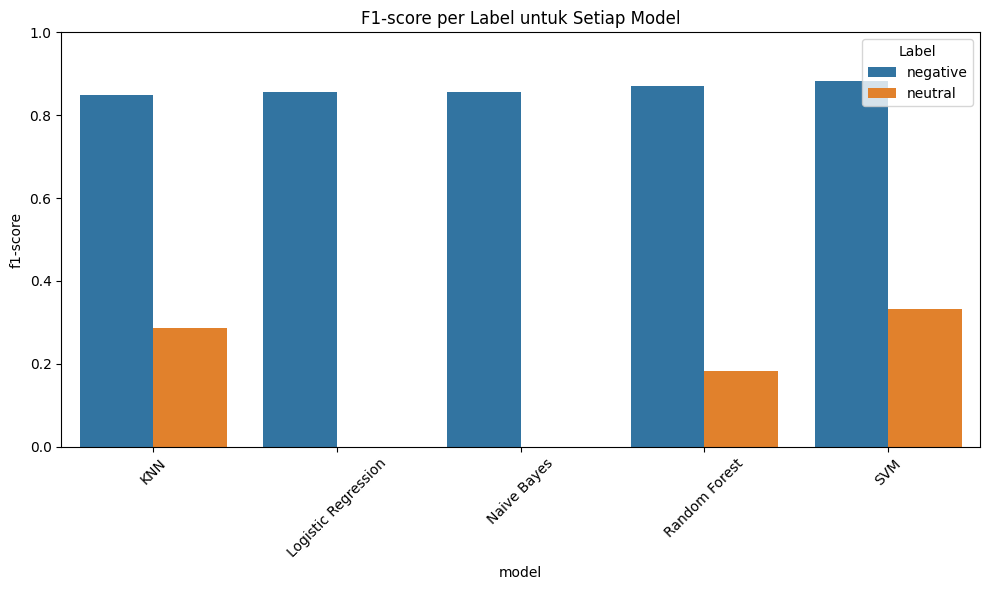

In [18]:
# Ambil F1-score per label
f1_per_label = data[data['index'].isin(['negative', 'neutral'])][['model', 'index', 'f1-score']]

# Pivot F1-score per label
f1_pivot = f1_per_label.pivot(index='model', columns='index', values='f1-score').reset_index()

# Plot F1-score per Kelas
f1_pivot_melt = f1_pivot.melt(id_vars='model', var_name='label', value_name='f1-score')
plt.figure(figsize=(10, 6))
sns.barplot(data=f1_pivot_melt, x='model', y='f1-score', hue='label')
plt.xticks(rotation=45)
plt.title('F1-score per Label untuk Setiap Model')
plt.ylim(0, 1)
plt.legend(title='Label')
plt.tight_layout()
plt.show()

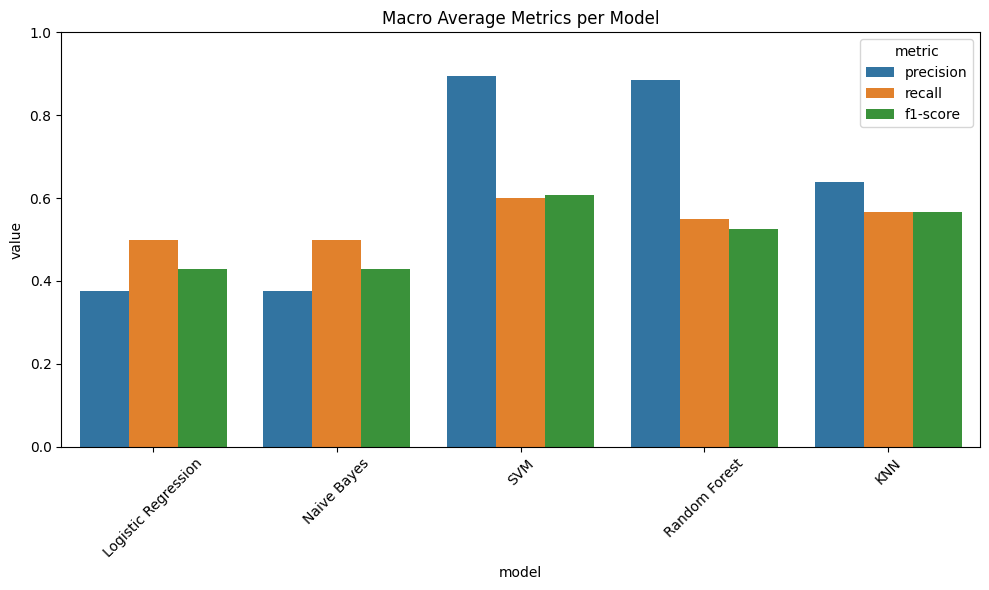

In [19]:
# 1. Visualisasi Macro Average (Precision, Recall, F1)
macro_avg = data[data['index'] == 'macro avg'][['model', 'precision', 'recall', 'f1-score']]
macro_avg_melt = macro_avg.melt(id_vars='model', var_name='metric', value_name='value')

plt.figure(figsize=(10, 6))
sns.barplot(data=macro_avg_melt, x='model', y='value', hue='metric')
plt.title('Macro Average Metrics per Model')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

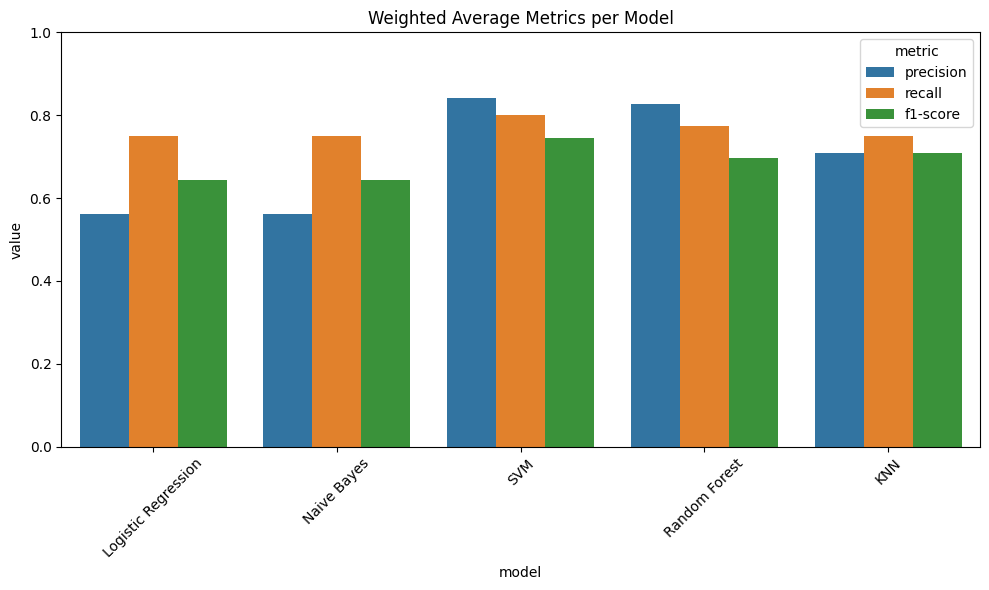

In [20]:
# 2. Visualisasi Weighted Average (Precision, Recall, F1)
weighted_avg = data[data['index'] == 'weighted avg'][['model', 'precision', 'recall', 'f1-score']]
weighted_avg_melt = weighted_avg.melt(id_vars='model', var_name='metric', value_name='value')

plt.figure(figsize=(10, 6))
sns.barplot(data=weighted_avg_melt, x='model', y='value', hue='metric')
plt.title('Weighted Average Metrics per Model')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

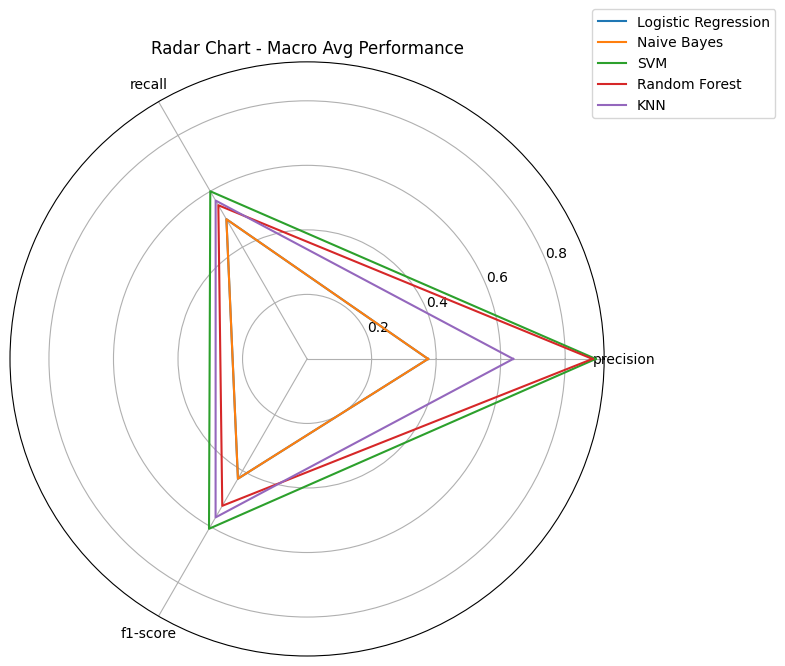

In [ ]:
# Siapkan data untuk radar chart
radar_data = macro_avg.set_index('model')
categories = list(radar_data.columns)
N = len(categories)

# Buat radar chart untuk tiap model
plt.figure(figsize=(8, 8))
for i, row in radar_data.iterrows():
    values = row.tolist()
    values += values[:1]  # tutup lingkaran
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    plt.polar(angles, values, label=i)
    
plt.xticks([n / float(N) * 2 * pi for n in range(N)], categories)
plt.title("Radar Chart - Macro Avg Performance")
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.tight_layout()
plt.show()

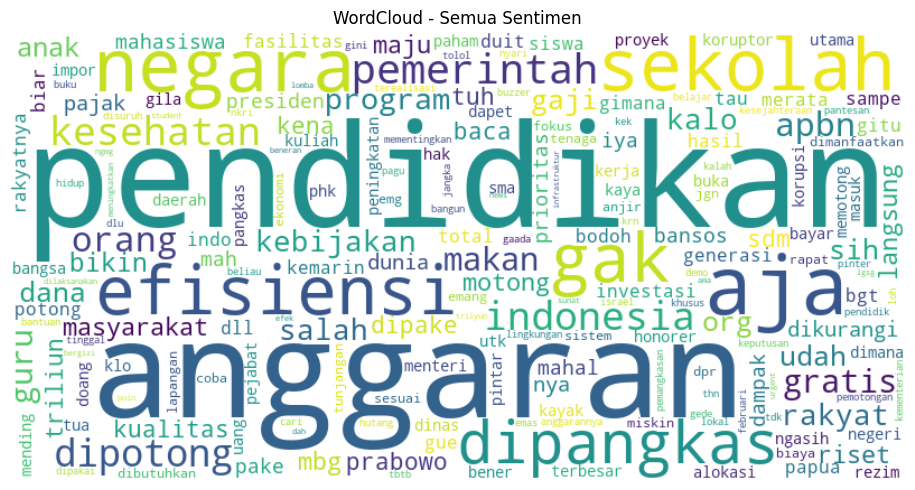

In [16]:
dataset = pd.read_csv('./tweets_with_label.csv')

# Gabungkan semua filtered_tokens jadi satu list
all_tokens = dataset['filtered_tokens'].dropna().astype(str).str.strip('[]').str.replace("'", "").str.split(', ')
all_tokens_flat = [token for sublist in all_tokens for token in sublist]

# Gabung dan buat WordCloud
text = ' '.join(all_tokens_flat)
wordcloud = WordCloud(width=800, height=400, background_color='white', collocations=False).generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud - Semua Sentimen')
plt.tight_layout()
plt.show()

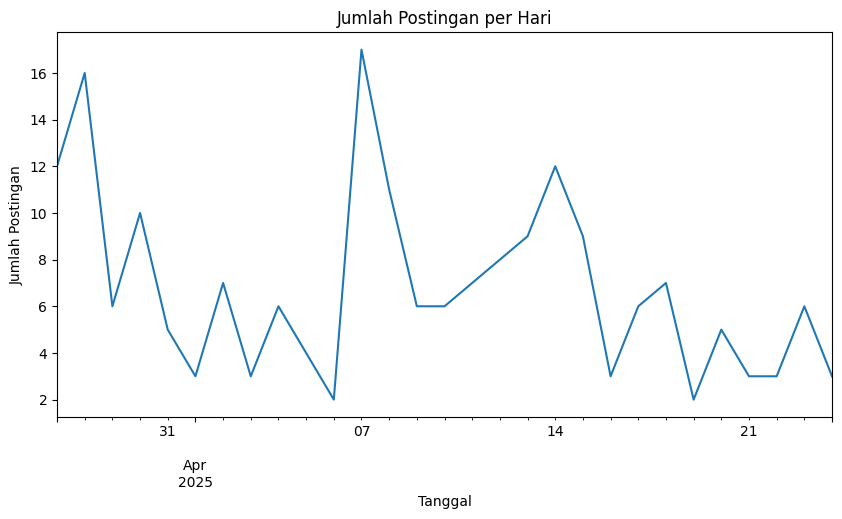

In [19]:
dataset['timestamp'] = pd.to_datetime(dataset['timestamp'])
daily_counts = dataset.set_index('timestamp').resample('D').size()
plt.figure(figsize=(10,5))
daily_counts.plot()
plt.title('Jumlah Postingan per Hari')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Postingan')
plt.show()

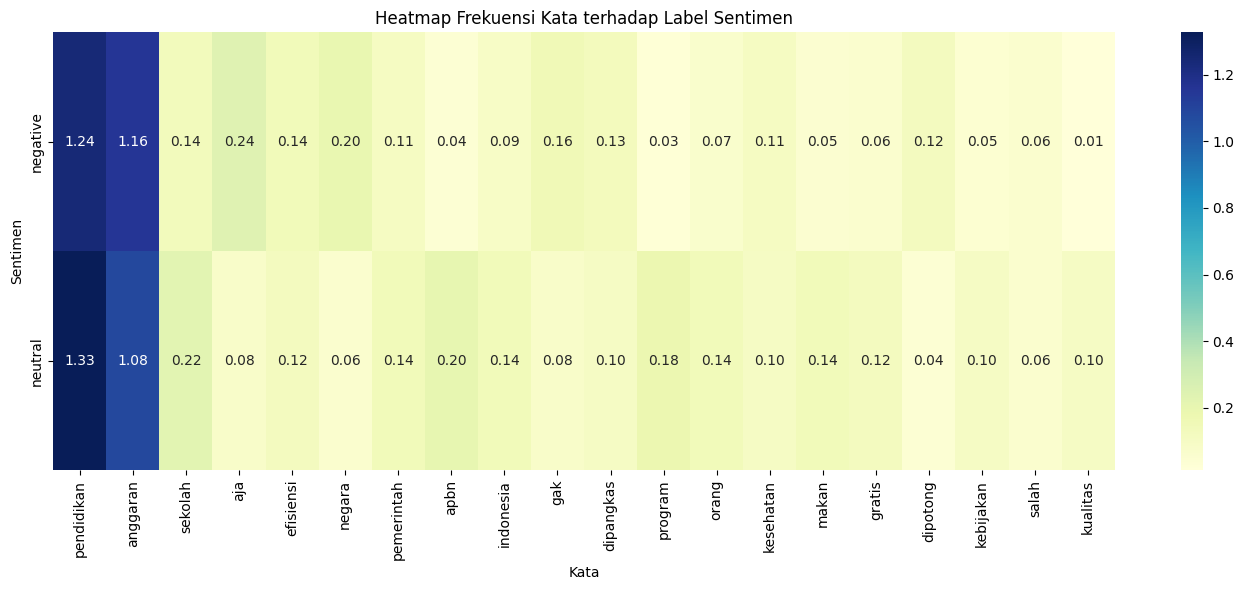

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
import ast  # Untuk mengubah string list ke list Python

# Pastikan kolom 'filtered_tokens' dari string list ke list Python
dataset['filtered_tokens'] = dataset['filtered_tokens'].apply(ast.literal_eval)

# Gabungkan token menjadi string untuk digunakan dalam CountVectorizer
dataset['joined_tokens'] = dataset['filtered_tokens'].apply(lambda x: ' '.join(x))

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(dataset['joined_tokens'])

# Ubah ke DataFrame
word_freq_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
word_freq_df['sentiment'] = dataset['sentiment']

grouped = word_freq_df.groupby('sentiment').mean()

# Pilih kata-kata paling sering muncul secara total
top_n = 20
top_words = grouped.sum().sort_values(ascending=False).head(top_n).index

# Filter hanya top words
heatmap_data = grouped[top_words]

# Plot heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title("Heatmap Frekuensi Kata terhadap Label Sentimen")
plt.xlabel("Kata")
plt.ylabel("Sentimen")
plt.tight_layout()
plt.show()